In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import os

import h5py as h5

# Sod shocktube test:

In [2]:
# Sod shocktube test.
gamma = 1.4

basedir_mfm = '/home/nina/Downloads/scp_transfers/output_shocktube_emass/'
basedir_mfv = '/home/nina/Downloads/scp_transfers/output_shocktube_diffmass/'

# exact solution at t = 5.0 s.
exact_sol = '/home/nina/Downloads/scp_transfers/shocktube_exact.txt'

x_e   = np.loadtxt(exact_sol, usecols=0, dtype=float)
rho_e = np.loadtxt(exact_sol, usecols=1, dtype=float)
p_e   = np.loadtxt(exact_sol, usecols=2, dtype=float)
ent_e = np.loadtxt(exact_sol, usecols=3, dtype=float)

e_e = (1.0 / (gamma - 1.0)) * np.divide(p_e, rho_e)

v_e   = np.loadtxt(exact_sol, usecols=4, dtype=float)

data_exact = np.zeros((len(x_e), 5))
data_exact[:, 0] = x_e; data_exact[:, 1] = v_e; data_exact[:, 2] = rho_e; data_exact[:, 3] = p_e
data_exact[:, 4] = e_e

In [3]:
def get_snapshot_data(basedir, i):
    
    gamma = 1.4
    
    fname = os.path.join(basedir, 'snapshot_{0:03d}.hdf5'.format(i))
    
    f = h5.File(fname, 'r')
    
    header = f['Header']
    data   = f['PartType0']
    
    t = header.attrs['Time']

    x_vals = data['Coordinates'][:, 0]
    rho_vals = data['Density'][:]
    e_vals = data['InternalEnergy'][:]
    v_vals = data['Velocities'][:, 0]
    
    p_vals = (gamma - 1.0) * np.multiply(e_vals, rho_vals)
    
    data = np.zeros((len(x_vals), 5))
    data[:, 0] = x_vals; data[:, 1] = v_vals; data[:, 2] = rho_vals; data[:, 3] = p_vals
    data[:, 4] = e_vals
    
    return t, data

# Plot solution.
def make_plots(t, datam, datav, data0, plot_ref_sol=False):
    
    mpl.rcParams['xtick.labelsize'] = 12.0
    mpl.rcParams['ytick.labelsize'] = 12.0
    
    xm = datam[:, 0]; vm = datam[:, 1]; rhom = datam[:, 2]; pm = datam[:, 3]; em = datam[:, 4]  # MFM
    xv = datav[:, 0]; vv = datav[:, 1]; rhov = datav[:, 2]; pv = datav[:, 3]; ev = datav[:, 4]  # MFV
    x0 = data0[:, 0]; v0 = data0[:, 1]; rho0 = data0[:, 2]; p0 = data0[:, 3]; e0 = data0[:, 4]  # ref. sol.
    
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    
    axs[0, 0].scatter(xv, rhov, color='b', marker='+', s=35.0, label='MFV (unequal mass)')
    axs[0, 1].scatter(xv, vv, color='b', marker='+', s=35.0, label='MFV (unequal mass)')
    axs[1, 0].scatter(xv, pv, color='b', marker='+', s=35.0, label='MFV (unequal mass)')
    axs[1, 1].scatter(xv, ev, color='b', marker='+', s=35.0, label='MFV (unequal mass)')
    
    axs[0, 0].scatter(xm, rhom, color='r', s=25.0, marker='*', label='MFM (equal mass)')
    axs[0, 1].scatter(xm, vm, color='r', s=25.0, marker='*',label='MFM (equal mass)')
    axs[1, 0].scatter(xm, pm, color='r', s=25.0, marker='*',label='MFM (equal mass)')
    axs[1, 1].scatter(xm, em, color='r', s=25.0, marker='*',label='MFM (equal mass)')
    
    if plot_ref_sol:
        axs[0, 0].plot(x0, rho0, linewidth=1.5, linestyle='--', color='gray', label='exact')
        axs[0, 1].plot(x0, v0, linewidth=1.5, linestyle='--', color='gray', label='exact')
        axs[1, 0].plot(x0, p0, linewidth=1.5, linestyle='--', color='gray', label='exact')
        axs[1, 1].plot(x0, e0, linewidth=1.5, linestyle='--',color='gray', label='exact')
    
    axs[0, 0].set_xlabel(r'$x$', fontsize='x-large')
    axs[0, 0].set_ylabel(r'$\rho$', fontsize='x-large')
    axs[0, 0].set_title('density', fontsize='xx-large')
    axs[0, 0].legend(fontsize=12.0)
    
    axs[0, 0].annotate('t = {0:.2f} s'.format(t), xy=(0.8, 0.75), fontsize='xx-large')
    
    axs[0, 1].set_xlabel(r'$x$', fontsize='x-large')
    axs[0, 1].set_ylabel(r'$v$', fontsize='x-large')
    axs[0, 1].set_title('velocity', fontsize='xx-large')
    axs[0, 1].legend(fontsize=12.0)
    
    axs[1, 0].set_xlabel(r'$x$', fontsize='x-large')
    axs[1, 0].set_ylabel(r'$P$', fontsize='x-large')
    axs[1, 0].set_title('pressure', fontsize='xx-large')
    axs[1, 0].legend(fontsize=12.0)
    
    axs[1, 1].set_xlabel(r'$x$', fontsize='x-large')
    axs[1, 1].set_ylabel(r'$e$', fontsize='x-large')
    axs[1, 1].set_title('specific energy', fontsize='xx-large')
    axs[1, 1].legend(fontsize=12.0)
    
    axs[0, 0].grid(visible=True); axs[0, 1].grid(visible=True)
    axs[1, 0].grid(visible=True); axs[1, 1].grid(visible=True)
    
    plt.tight_layout()
    plt.show()
    
    return

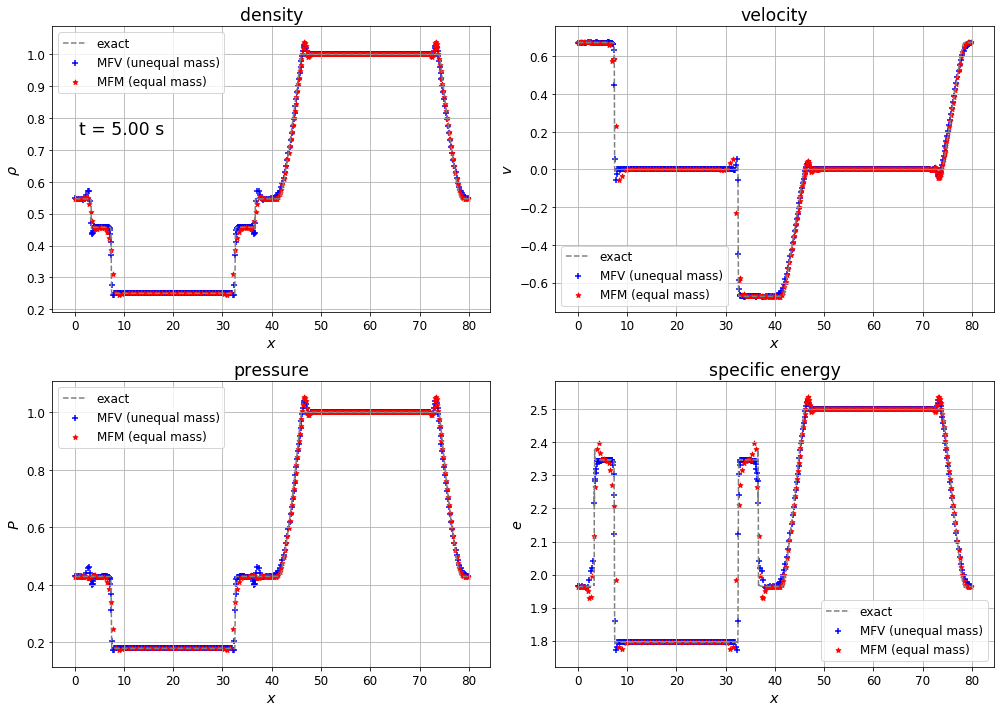

In [4]:
# Comparion to reference solution at t = 5.00 s.
i = 10

t_mfm, data_mfm = get_snapshot_data(basedir_mfm, i)
t_mfv, data_mfv = get_snapshot_data(basedir_mfv, i)

make_plots(t_mfm, data_mfm, data_mfv, data_exact, plot_ref_sol=True)

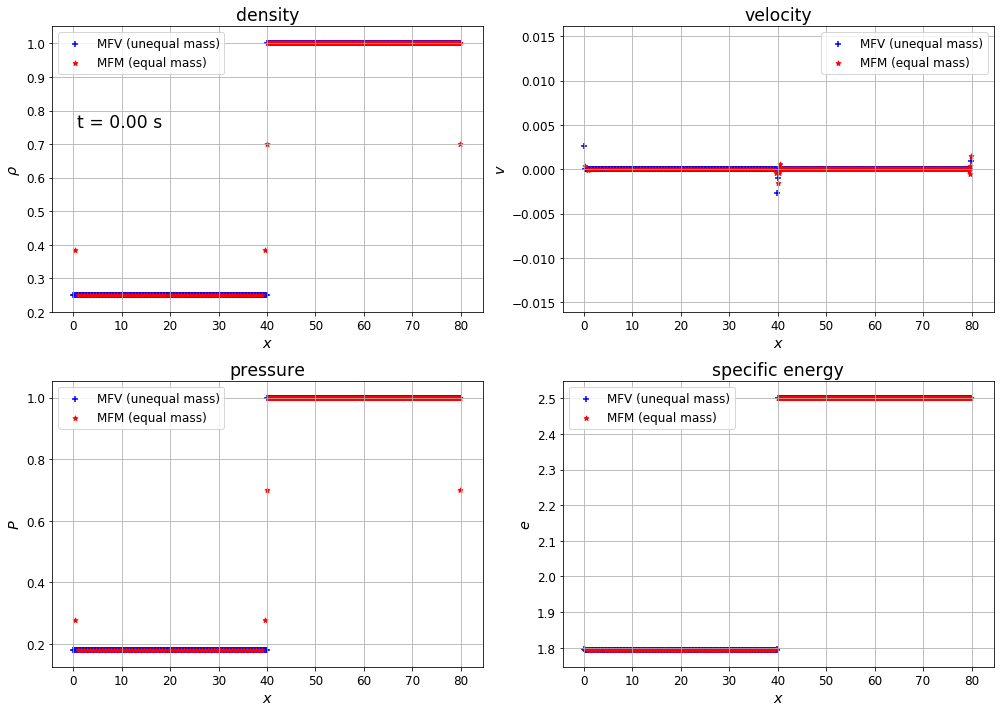

--------------------------------------------------------------------------



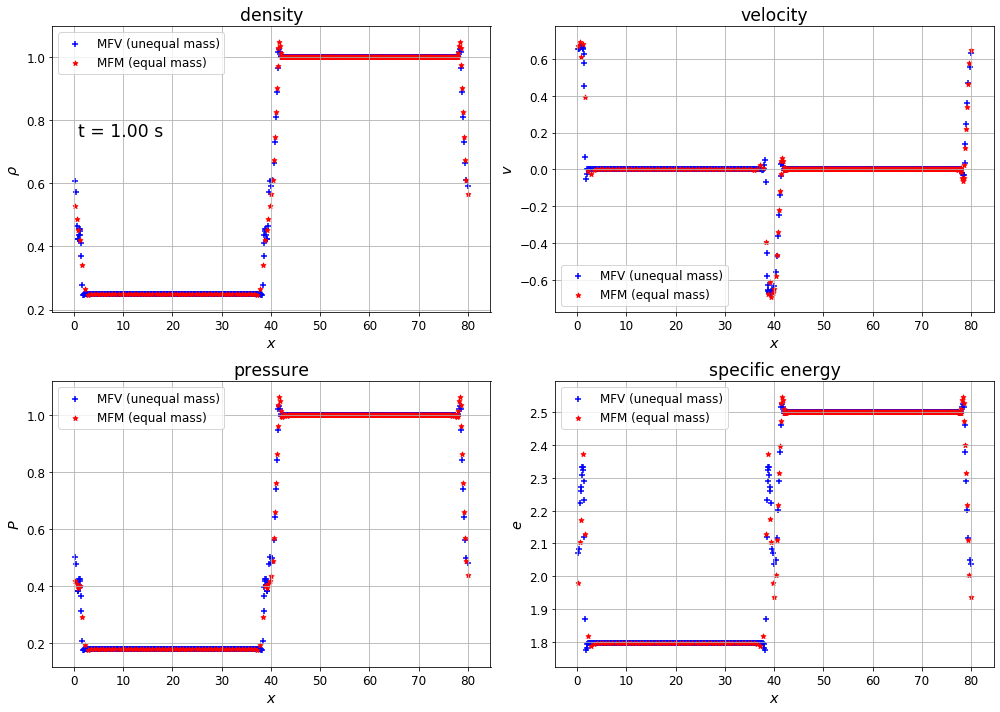

--------------------------------------------------------------------------



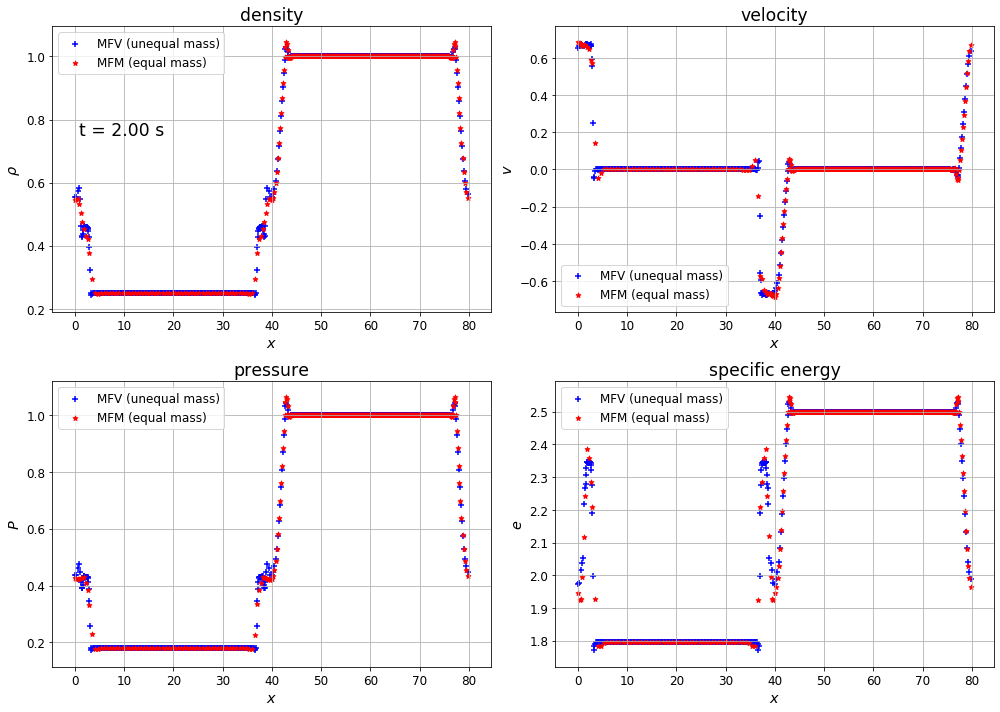

--------------------------------------------------------------------------



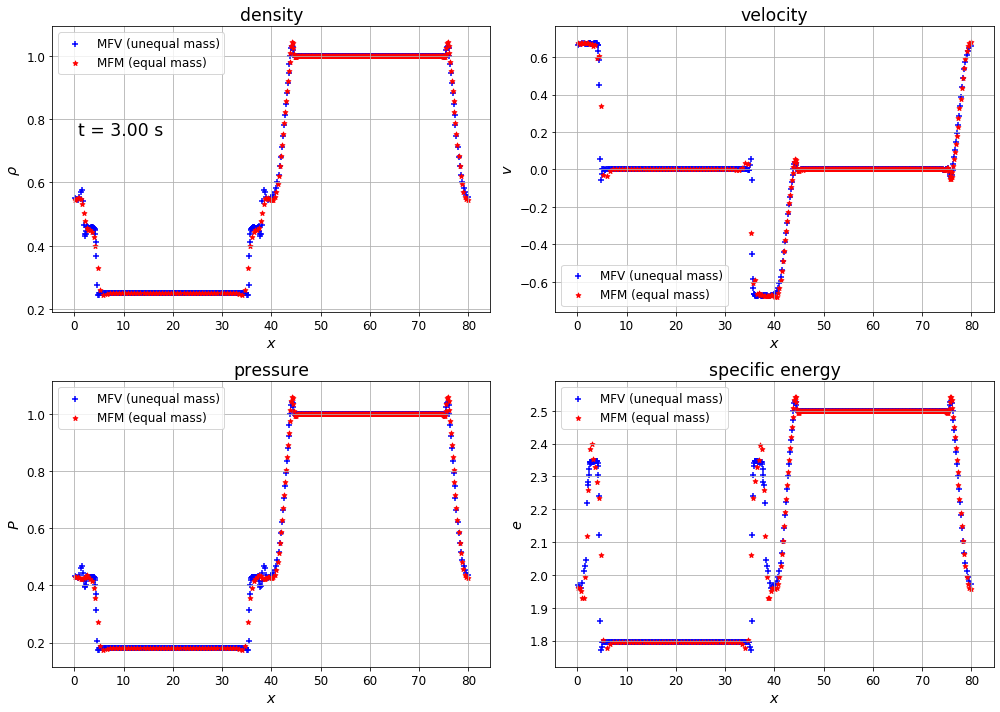

--------------------------------------------------------------------------



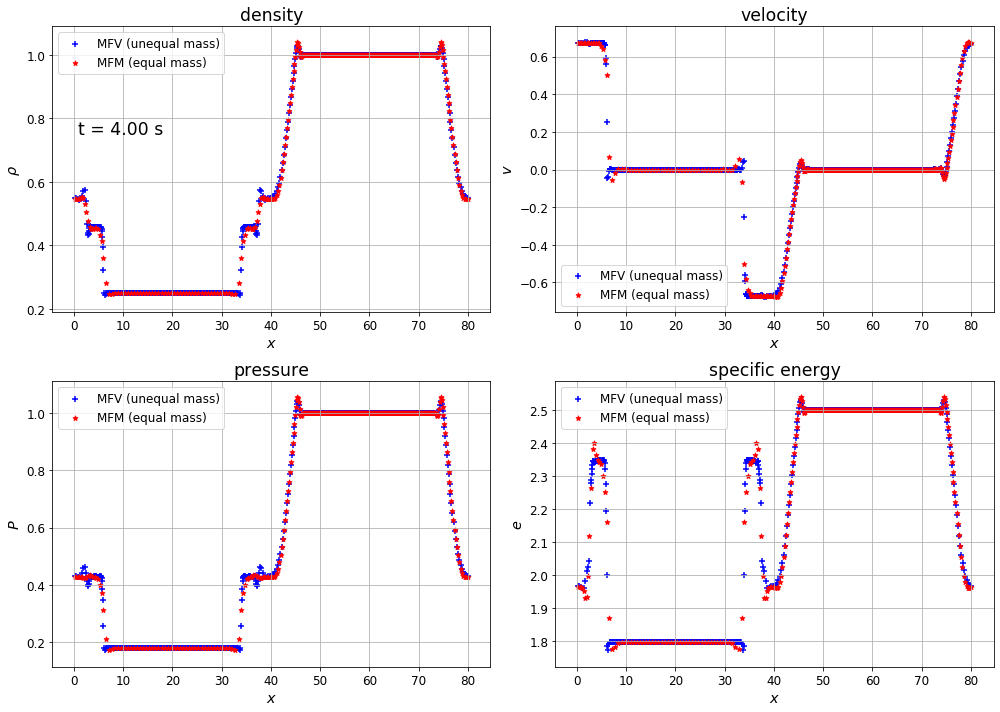

--------------------------------------------------------------------------



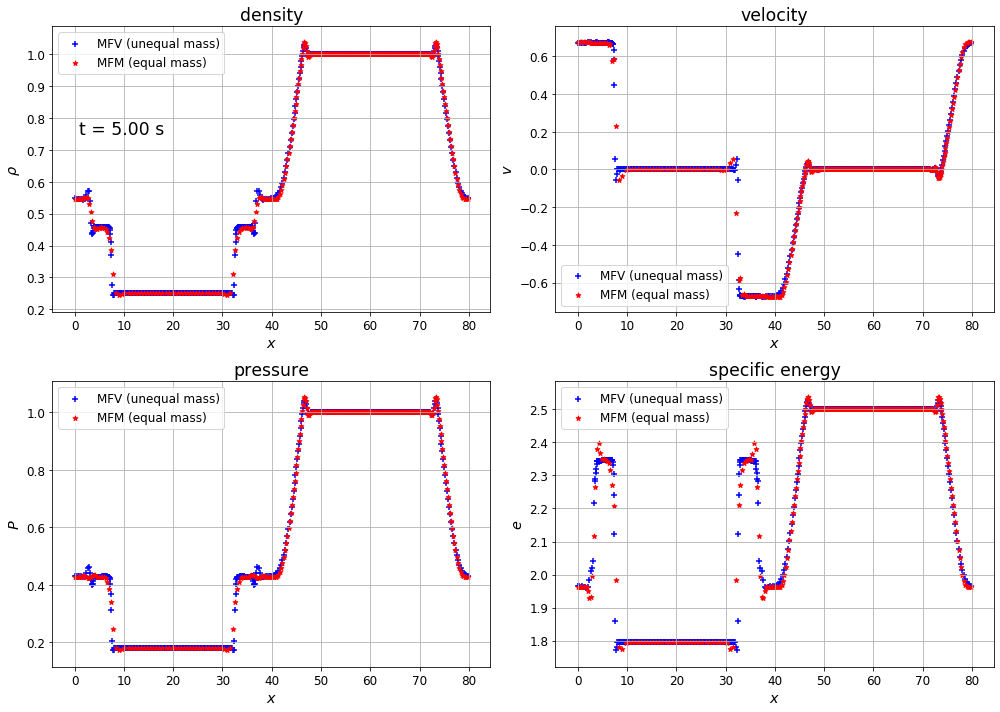

--------------------------------------------------------------------------



In [5]:
# Plots of every other snapshot snapshots.
for i in range(0, 11, 2):
    
    t_mfm, data_mfm = get_snapshot_data(basedir_mfm, i)
    t_mfv, data_mfv = get_snapshot_data(basedir_mfv, i)

    make_plots(t_mfm, data_mfm, data_mfv, data_exact)
    
    print('--------------------------------------------------------------------------\n')

# MFM vs. MFV

Both MFM and MFV methods produce small bumps at the rarefaction and contact discontinuities. The unequal-mass initial conditions have a jump in particle mass at the initial contact discontinuity, so the resolution is higher at the shock front with MFV; the shock front using the MFM solver is more broad. With MFV, the density overshoots at the shock front also result in artificial spikes in the pressure by $t = 5.00$ seconds. Both methods perform fairly well for this problem.

# Toth shocktube test:

In [6]:
# MHD test: Toth shocktube.
basedir_toth = '/home/nina/Downloads/scp_transfers/output_toth/'

In [7]:
def get_snapshot_data_toth(basedir, i):
    
    fname = os.path.join(basedir, 'snapshot_{0:03d}.hdf5'.format(i))
    
    f = h5.File(fname, 'r')
    
    header = f['Header']
    data   = f['PartType0']
    
    t = header.attrs['Time']

    x = data['Coordinates'][:, 0]
    y = data['Coordinates'][:, 1]
    z = data['Coordinates'][:, 2]
    
    u = data['Velocities'][:, 0]
    v = data['Velocities'][:, 1]
    w = data['Velocities'][:, 2]
    
    B_x = data['MagneticField'][:, 0]
    B_y = data['MagneticField'][:, 1]
    B_z = data['MagneticField'][:, 2]
    
    rho = data['Density'][:]
    e   = data['InternalEnergy'][:]
    
    
    return t, x, y, z, u, v, w, B_x, B_y, B_z, rho, e

In [8]:
t, x, y, z, u, v, w, B_x, B_y, B_z, rho, e = get_snapshot_data_toth(basedir_toth, 2)

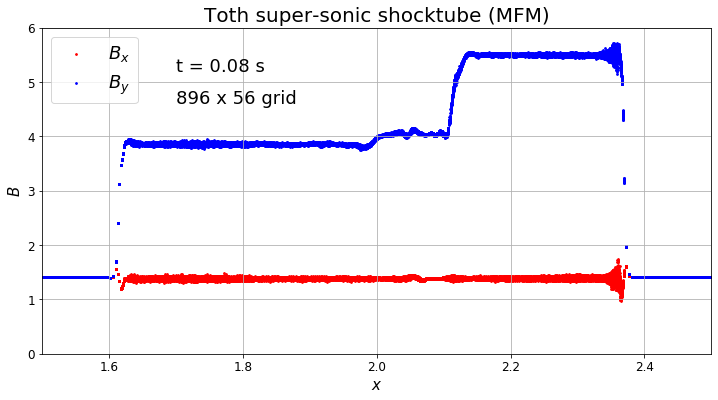

In [9]:
mpl.rcParams['xtick.labelsize'] = 12.0
mpl.rcParams['ytick.labelsize'] = 12.0

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.scatter(x, B_x, color='r', s=3.0, label=r'$B_x$')
ax.scatter(x, B_y, color='b', s=3.0, label=r'$B_y$')

ax.set_xlabel(r'$x$', fontsize=15.0)
ax.set_ylabel(r'$B$', fontsize=15.0)

ax.set_xlim(xmin=1.5, xmax=2.5)
ax.set_ylim(ymin=0.0, ymax=6.0)

ax.set_title('Toth super-sonic shocktube (MFM)', fontsize=20.0)

ax.annotate('t = {0:.2f} s'.format(t), xy=(1.7, 5.2), fontsize=18.0)
ax.annotate('896 x 56 grid'.format(t), xy=(1.7, 4.6), fontsize=18.0)

plt.legend(fontsize=18.0)
plt.grid(True)
plt.show()